In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('resume_automation_screening.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   resume_text        100 non-null    object 
 1   job_title          100 non-null    object 
 2   suitability_score  100 non-null    float64
dtypes: float64(1), object(2)
memory usage: 2.5+ KB


In [4]:
df.describe()

,suitability_score
count,100.000000
mean,0.583800
std,0.264269
min,0.030000
25%,0.420000
50%,0.610000
75%,0.782500
max,1.000000


In [5]:
df.shape

(100, 3)

In [6]:
df.head()

,resume_text,job_title,suitability_score
0,"Experienced in machine learning, data analysis...",Data Scientist,0.37
1,"Experienced in roadmap, agile, stakeholders.",Product Manager,0.11
2,"Experienced in stakeholders, roadmap, market r...",Product Manager,0.32
3,"Experienced in agile, MVP, stakeholders.",Product Manager,0.90
4,"Experienced in python, pandas, statistics.",Data Scientist,0.11


In [7]:
df['job_title'].value_counts()

,count
job_title,
Data Scientist,25
Product Manager,23
HR Specialist,18
Marketing Manager,17
Software Engineer,17


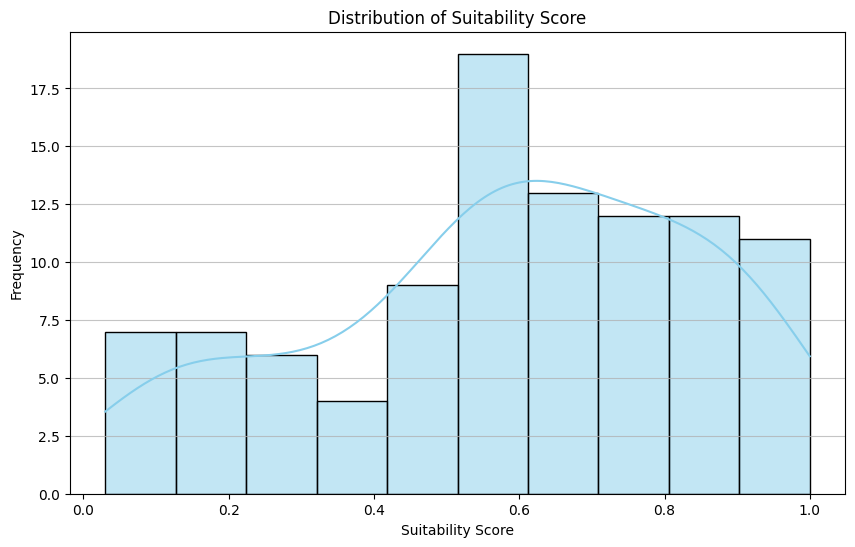

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['suitability_score'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of Suitability Score')
plt.xlabel('Suitability Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [9]:
for job_title in df['job_title'].unique():
    print(f"\n--- Job Title: {job_title} ---")
    # Get up to 3 random samples for the current job title
    samples = df[df['job_title'] == job_title].sample(n=min(3, len(df[df['job_title'] == job_title])), random_state=42)
    for i, row in samples.iterrows():
        print(f"Resume Example {i+1}:\n{row['resume_text']}\n")


--- Job Title: Data Scientist ---
Resume Example 32:
Experienced in python, machine learning, pandas.

Resume Example 61:
Experienced in data analysis, python, statistics.

Resume Example 1:
Experienced in machine learning, data analysis, statistics.


--- Job Title: Product Manager ---
Resume Example 60:
Experienced in MVP, agile, roadmap.

Resume Example 34:
Experienced in stakeholders, agile, roadmap.

Resume Example 2:
Experienced in roadmap, agile, stakeholders.


--- Job Title: Marketing Manager ---
Resume Example 6:
Experienced in SEO, content, campaign.

Resume Example 11:
Experienced in campaign, branding, content.

Resume Example 50:
Experienced in SEO, content, campaign.


--- Job Title: HR Specialist ---
Resume Example 8:
Experienced in recruitment, HR software, training.

Resume Example 13:
Experienced in HR software, employee relations, communication.

Resume Example 45:
Experienced in communication, employee relations, recruitment.


--- Job Title: Software Engineer ---

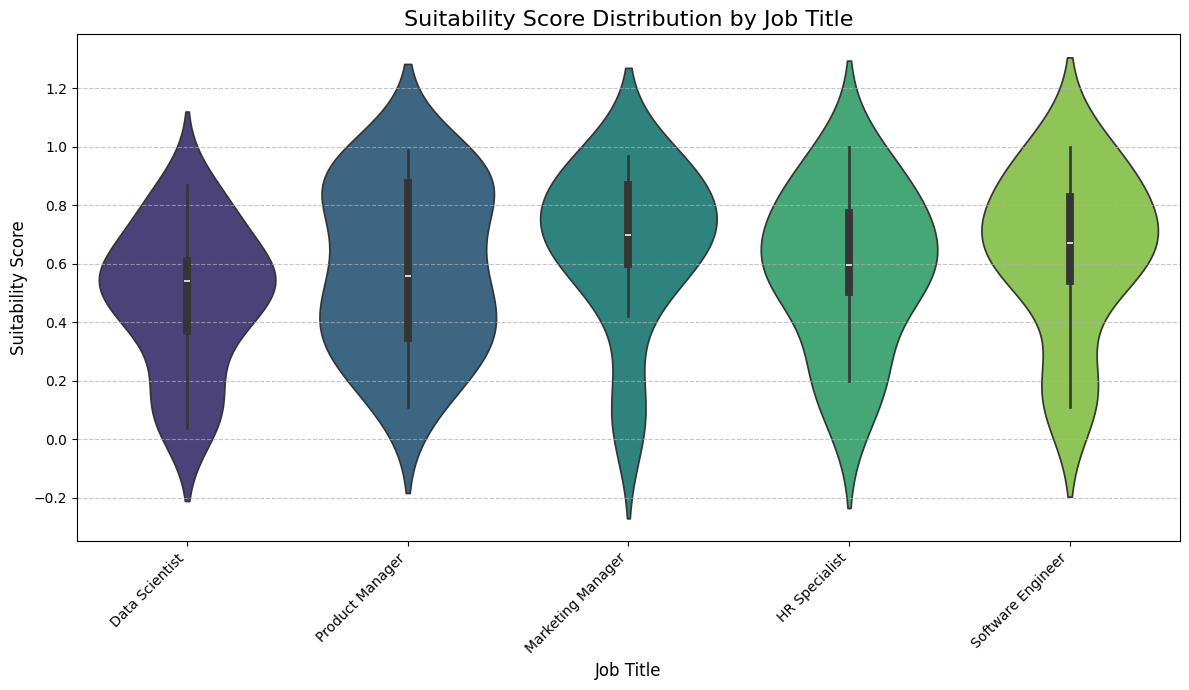

In [10]:
plt.figure(figsize=(12, 7))
sns.violinplot(x='job_title', y='suitability_score', data=df, palette='viridis')
plt.title('Suitability Score Distribution by Job Title', fontsize=16)
plt.xlabel('Job Title', fontsize=12)
plt.ylabel('Suitability Score', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [11]:
df.groupby('job_title')['suitability_score'].mean().sort_values(ascending=False)

,suitability_score
job_title,
Marketing Manager,0.665294
Software Engineer,0.641765
Product Manager,0.588261
HR Specialist,0.586111
Data Scientist,0.483200


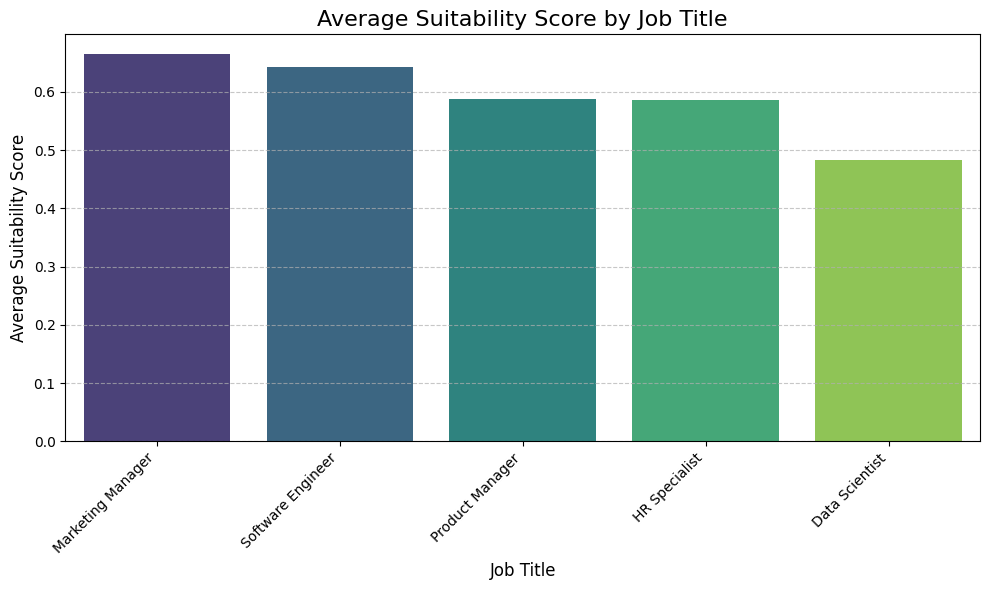

In [12]:
plt.figure(figsize=(10, 6))
avg_suitability_score = df.groupby('job_title')['suitability_score'].mean().sort_values(ascending=False)
sns.barplot(x=avg_suitability_score.index, y=avg_suitability_score.values, palette='viridis')
plt.title('Average Suitability Score by Job Title', fontsize=16)
plt.xlabel('Job Title', fontsize=12)
plt.ylabel('Average Suitability Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

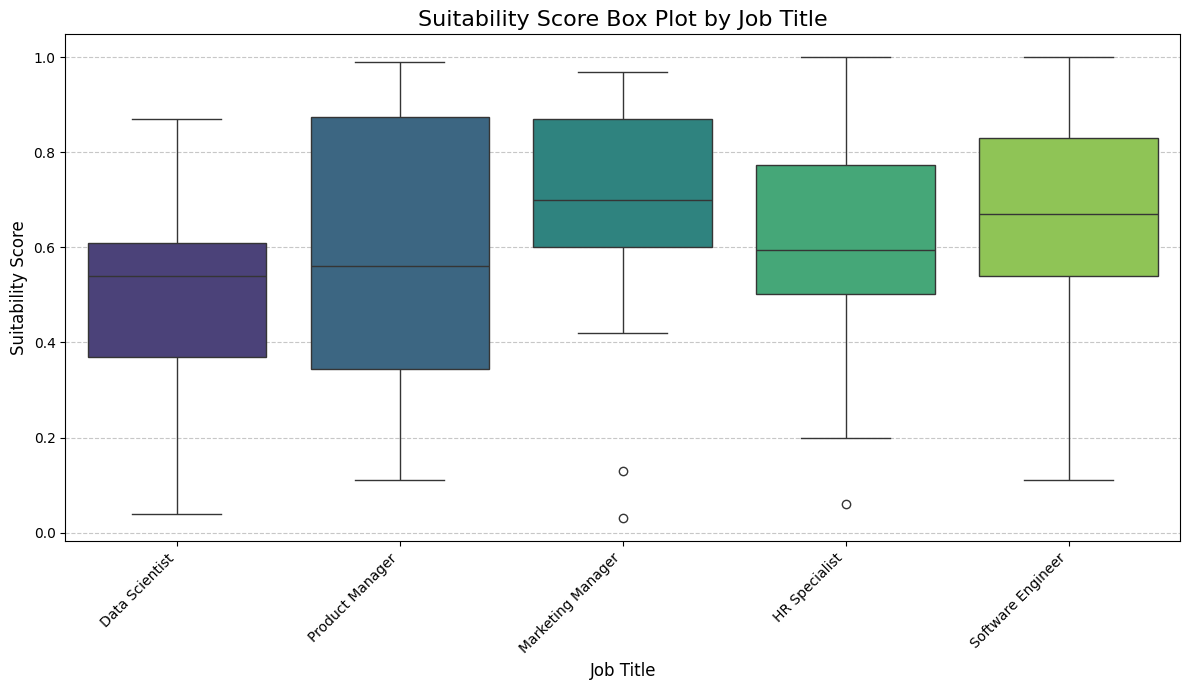

In [13]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='job_title', y='suitability_score', data=df, palette='viridis')
plt.title('Suitability Score Box Plot by Job Title', fontsize=16)
plt.xlabel('Job Title', fontsize=12)
plt.ylabel('Suitability Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [14]:
df.isnull().sum()

,0
resume_text,0
job_title,0
suitability_score,0


In [15]:
unique_job_titles = df['job_title'].unique()
job_title_numbers = {}
i = 0
for job_title in unique_job_titles:
    job_title_numbers[job_title] = i
    i += 1
df['job_title'] = df['job_title'].map(job_title_numbers)

display(df.head())

,resume_text,job_title,suitability_score
0,"Experienced in machine learning, data analysis...",0,0.37
1,"Experienced in roadmap, agile, stakeholders.",1,0.11
2,"Experienced in stakeholders, roadmap, market r...",1,0.32
3,"Experienced in agile, MVP, stakeholders.",1,0.90
4,"Experienced in python, pandas, statistics.",0,0.11


In [16]:
print("Job Title to Number Mapping:")
print(job_title_numbers)

Job Title to Number Mapping:
{'Data Scientist': 0, 'Product Manager': 1, 'Marketing Manager': 2, 'HR Specialist': 3, 'Software Engineer': 4}


In [17]:
if 'job_title_encoded' in df.columns:
    df = df.drop(columns=['job_title_encoded'])
    print("'job_title_encoded' column removed successfully.")
else:
    print("'job_title_encoded' column does not exist in the DataFrame.")
display(df.head())

'job_title_encoded' column does not exist in the DataFrame.


,resume_text,job_title,suitability_score
0,"Experienced in machine learning, data analysis...",0,0.37
1,"Experienced in roadmap, agile, stakeholders.",1,0.11
2,"Experienced in stakeholders, roadmap, market r...",1,0.32
3,"Experienced in agile, MVP, stakeholders.",1,0.90
4,"Experienced in python, pandas, statistics.",0,0.11


In [18]:
df

,resume_text,job_title,suitability_score
0,"Experienced in machine learning, data analysis...",0,0.37
1,"Experienced in roadmap, agile, stakeholders.",1,0.11
2,"Experienced in stakeholders, roadmap, market r...",1,0.32
3,"Experienced in agile, MVP, stakeholders.",1,0.90
4,"Experienced in python, pandas, statistics.",0,0.11
...,...,...,...
95,"Experienced in pandas, python, statistics.",0,0.13
96,"Experienced in campaign, analytics, content.",2,0.94
97,"Experienced in analytics, branding, SEO.",2,0.87
98,"Experienced in data analysis, python, statistics.",0,0.48


In [19]:
df.columns

Index(['resume_text', 'job_title', 'suitability_score'], dtype='object')

In [20]:
df['resume_text']=df['resume_text'].apply(lambda x : x.lower())

In [21]:
df


,resume_text,job_title,suitability_score
0,"experienced in machine learning, data analysis...",0,0.37
1,"experienced in roadmap, agile, stakeholders.",1,0.11
2,"experienced in stakeholders, roadmap, market r...",1,0.32
3,"experienced in agile, mvp, stakeholders.",1,0.90
4,"experienced in python, pandas, statistics.",0,0.11
...,...,...,...
95,"experienced in pandas, python, statistics.",0,0.13
96,"experienced in campaign, analytics, content.",2,0.94
97,"experienced in analytics, branding, seo.",2,0.87
98,"experienced in data analysis, python, statistics.",0,0.48


In [22]:
import string

def remove_punc(txt):
  return txt.translate(str.maketrans('','',string.punctuation))


In [23]:
df['resume_text']=df['resume_text'].apply(remove_punc)

In [24]:
import re

def remove_numbers(text):
    return re.sub(r'\d+', '', text)

df['resume_text'] = df['resume_text'].apply(remove_numbers)
print("Numbers removed from 'resume_text' column.")
display(df.head())

Numbers removed from 'resume_text' column.


,resume_text,job_title,suitability_score
0,experienced in machine learning data analysis ...,0,0.37
1,experienced in roadmap agile stakeholders,1,0.11
2,experienced in stakeholders roadmap market res...,1,0.32
3,experienced in agile mvp stakeholders,1,0.90
4,experienced in python pandas statistics,0,0.11


In [25]:
import re

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

# Apply the function to the 'resume_text' column
df['resume_text'] = df['resume_text'].apply(remove_urls)
print("URLs removed from 'resume_text' column.")
display(df.head())

URLs removed from 'resume_text' column.


,resume_text,job_title,suitability_score
0,experienced in machine learning data analysis ...,0,0.37
1,experienced in roadmap agile stakeholders,1,0.11
2,experienced in stakeholders roadmap market res...,1,0.32
3,experienced in agile mvp stakeholders,1,0.90
4,experienced in python pandas statistics,0,0.11


In [26]:
import nltk
from nltk.corpus import stopwords
import re

# Download NLTK stopwords if not already downloaded
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    # Tokenize the text and remove stopwords
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# Apply the function to the 'resume_text' column
df['resume_text'] = df['resume_text'].apply(remove_stopwords)
print("Stopwords removed from 'resume_text' column.")
display(df.head())

Stopwords removed from 'resume_text' column.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,resume_text,job_title,suitability_score
0,experienced machine learning data analysis sta...,0,0.37
1,experienced roadmap agile stakeholders,1,0.11
2,experienced stakeholders roadmap market research,1,0.32
3,experienced agile mvp stakeholders,1,0.90
4,experienced python pandas statistics,0,0.11


In [27]:
X = df[['resume_text', 'job_title']]
y = df['suitability_score']

print("X (features) head:")
display(X.head())

print("\ny (target) head:")
display(y.head())

X (features) head:


,resume_text,job_title
0,experienced machine learning data analysis sta...,0
1,experienced roadmap agile stakeholders,1
2,experienced stakeholders roadmap market research,1
3,experienced agile mvp stakeholders,1
4,experienced python pandas statistics,0



y (target) head:


,suitability_score
0,0.37
1,0.11
2,0.32
3,0.90
4,0.11


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)

X_tfidf = tfidf_vectorizer.fit_transform(df['resume_text'])


X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print("Shape of TF-IDF features:", X_tfidf_df.shape)
display(X_tfidf_df.head())

Shape of TF-IDF features: (100, 32)


,agile,algorithms,analysis,analytics,backend,branding,campaign,communication,content,data,...,recruitment,relations,research,roadmap,seo,software,stakeholders,statistics,system,training
0,0.000000,0.0,0.435963,0.0,0.0,0.0,0.0,0.0,0.0,0.435963,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.445464,0.0,0.0
1,0.580392,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.520837,0.0,0.0,0.594845,0.000000,0.0,0.0
2,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.501972,0.450463,0.0,0.0,0.514472,0.000000,0.0,0.0
3,0.562248,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.576249,0.000000,0.0,0.0
4,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.554365,0.0,0.0


In [30]:

X_tfidf_df.index = df.index
X = pd.concat([df['job_title'], X_tfidf_df], axis=1)

print("Final X (features) head with TF-IDF features:")
display(X.head())
print("Shape of final X:", X.shape)


Final X (features) head with TF-IDF features:


,job_title,agile,algorithms,analysis,analytics,backend,branding,campaign,communication,content,...,recruitment,relations,research,roadmap,seo,software,stakeholders,statistics,system,training
0,0,0.000000,0.0,0.435963,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.445464,0.0,0.0
1,1,0.580392,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.520837,0.0,0.0,0.594845,0.000000,0.0,0.0
2,1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.501972,0.450463,0.0,0.0,0.514472,0.000000,0.0,0.0
3,1,0.562248,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.576249,0.000000,0.0,0.0
4,0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.554365,0.0,0.0


Shape of final X: (100, 33)


In [31]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (80, 33)
Shape of X_test: (20, 33)
Shape of y_train: (80,)
Shape of y_test: (20,)


In [32]:
from sklearn.metrics.pairwise import cosine_similarity

reverse_job_title_mapping = {v: k for k, v in job_title_numbers.items()}
job_title_textual = df['job_title'].map(reverse_job_title_mapping)

jd_tfidf_vectors = tfidf_vectorizer.transform(job_title_textual)

resume_tfidf_vectors = X_tfidf


df['similarity_score'] = [
    cosine_similarity(resume_tfidf_vectors[i], jd_tfidf_vectors[i])[0][0]
    for i in range(len(df))
]


display(df[['resume_text', 'job_title', 'suitability_score', 'similarity_score']].head())

,resume_text,job_title,suitability_score,similarity_score
0,experienced machine learning data analysis sta...,0,0.37,0.435963
1,experienced roadmap agile stakeholders,1,0.11,0.000000
2,experienced stakeholders roadmap market research,1,0.32,0.000000
3,experienced agile mvp stakeholders,1,0.90,0.000000
4,experienced python pandas statistics,0,0.11,0.000000


In [33]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

df['cluster_label'] = kmeans.fit_predict(X)
print("Count of samples per cluster:")
print(df['cluster_label'].value_counts())


cluster_suitability = df.groupby('cluster_label')['suitability_score'].mean().sort_values(ascending=False)
print("\nAverage suitability score per cluster (sorted):")
print(cluster_suitability)


cluster_mapping = {
    cluster_suitability.index[0]: 'good fit',
    cluster_suitability.index[1]: 'average fit',
    cluster_suitability.index[2]: 'bad fit'
}

df['fit_category'] = df['cluster_label'].map(cluster_mapping)

print("\nMapping of Cluster Label to Fit Category:")
print(cluster_mapping)

print("\nDataFrame head with cluster labels and fit categories:")
display(df[['resume_text', 'job_title', 'suitability_score', 'cluster_label', 'fit_category']].head())

Count of samples per cluster:
cluster_label
2    40
0    35
1    25
Name: count, dtype: int64

Average suitability score per cluster (sorted):
cluster_label
2    0.621000
0    0.613143
1    0.483200
Name: suitability_score, dtype: float64

Mapping of Cluster Label to Fit Category:
{np.int32(2): 'good fit', np.int32(0): 'average fit', np.int32(1): 'bad fit'}

DataFrame head with cluster labels and fit categories:


,resume_text,job_title,suitability_score,cluster_label,fit_category
0,experienced machine learning data analysis sta...,0,0.37,1,bad fit
1,experienced roadmap agile stakeholders,1,0.11,2,good fit
2,experienced stakeholders roadmap market research,1,0.32,2,good fit
3,experienced agile mvp stakeholders,1,0.90,2,good fit
4,experienced python pandas statistics,0,0.11,1,bad fit


In [34]:
new_job_description = "Experienced in machine learning, deep learning, python, data analysis, and model deployment."
print(f"New Job Description defined: {new_job_description}")

New Job Description defined: Experienced in machine learning, deep learning, python, data analysis, and model deployment.


In [35]:
new_job_description = new_job_description.lower()
print(f"After lowercasing: {new_job_description}")

new_job_description = remove_punc(new_job_description)
print(f"After removing punctuation: {new_job_description}")

new_job_description = remove_numbers(new_job_description)
print(f"After removing numbers: {new_job_description}")

new_job_description = remove_urls(new_job_description)
print(f"After removing URLs: {new_job_description}")

new_job_description = remove_stopwords(new_job_description)
print(f"After removing stopwords: {new_job_description}")

print(f"\nFinal preprocessed new job description: {new_job_description}")

After lowercasing: experienced in machine learning, deep learning, python, data analysis, and model deployment.
After removing punctuation: experienced in machine learning deep learning python data analysis and model deployment
After removing numbers: experienced in machine learning deep learning python data analysis and model deployment
After removing URLs: experienced in machine learning deep learning python data analysis and model deployment
After removing stopwords: experienced machine learning deep learning python data analysis model deployment

Final preprocessed new job description: experienced machine learning deep learning python data analysis model deployment


In [36]:
new_jd_tfidf = tfidf_vectorizer.transform([new_job_description])
print(f"Shape of new job description TF-IDF vector: {new_jd_tfidf.shape}")

Shape of new job description TF-IDF vector: (1, 32)


In [37]:

from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity between each resume TF-IDF vector and the new job description TF-IDF vector
df['jd_similarity_score'] = cosine_similarity(X_tfidf, new_jd_tfidf).flatten()

# Display the head of the DataFrame with relevant columns
print("DataFrame head with new job description similarity scores:")
display(df[['resume_text', 'job_title', 'jd_similarity_score']].head())

DataFrame head with new job description similarity scores:


,resume_text,job_title,jd_similarity_score
0,experienced machine learning data analysis sta...,0,0.799263
1,experienced roadmap agile stakeholders,1,0.024427
2,experienced stakeholders roadmap market research,1,0.021127
3,experienced agile mvp stakeholders,1,0.023664
4,experienced python pandas statistics,0,0.192033


In [38]:
ranked_resumes = df.sort_values(by='jd_similarity_score', ascending=False)

print("Top 10 Resumes ranked by similarity to the new job description:")
display(ranked_resumes[['job_title', 'resume_text', 'jd_similarity_score']].head(10))

Top 10 Resumes ranked by similarity to the new job description:


,job_title,resume_text,jd_similarity_score
78,0,experienced python data analysis machine learning,0.948243
58,0,experienced machine learning python data analysis,0.948243
53,0,experienced python data analysis machine learning,0.948243
50,0,experienced machine learning python data analysis,0.948243
0,0,experienced machine learning data analysis sta...,0.799263
75,0,experienced data analysis statistics machine l...,0.799263
70,0,experienced pandas machine learning data analysis,0.777870
56,0,experienced pandas data analysis machine learning,0.777870
26,0,experienced pandas machine learning data analysis,0.777870
36,0,experienced python statistics machine learning,0.709671


In [39]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
# You can tune parameters like n_estimators (number of trees) and random_state for reproducibility
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

print("Random Forest Regressor model trained successfully!")

Random Forest Regressor model trained successfully!


In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2 Score): {r2:.4f}")

# Optionally, display a comparison of actual vs. predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
display(results_df.head())

Mean Absolute Error (MAE): 0.2608
Mean Squared Error (MSE): 0.0914
R-squared (R2 Score): -0.0790


,Actual,Predicted
83,0.78,0.628300
53,0.87,0.434777
70,0.77,0.493665
45,0.70,0.583392
44,0.54,0.427793


In [41]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

print("GridSearchCV imported and parameter grid defined.")

GridSearchCV imported and parameter grid defined.


In [42]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='r2', verbose=2)
grid_search.fit(X_train, y_train)

print("GridSearchCV fitting complete.")

Fitting 3 folds for each of 36 candidates, totalling 108 fits
GridSearchCV fitting complete.


In [43]:
print("Best parameters found: ", grid_search.best_params_)
print("Best R2 score: ", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"\nMetrics of the best model on the test set:")
print(f"Mean Absolute Error (MAE): {mae_best:.4f}")
print(f"Mean Squared Error (MSE): {mse_best:.4f}")
print(f"R-squared (R2 Score): {r2_best:.4f}")

Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best R2 score:  -0.4949506268155741

Metrics of the best model on the test set:
Mean Absolute Error (MAE): 0.2477
Mean Squared Error (MSE): 0.0812
R-squared (R2 Score): 0.0410


### Step 1: Train a Gradient Boosting Regressor Model

We will now use the `GradientBoostingRegressor` from `sklearn.ensemble` to train our model on the prepared training data (`X_train`, `y_train`).

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Gradient Boosting Regressor model
# You can tune parameters like n_estimators, learning_rate, max_depth
gradient_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gradient_model.fit(X_train, y_train)

print("Gradient Boosting Regressor model trained successfully!")

Gradient Boosting Regressor model trained successfully!


### Step 2: Make Predictions and Evaluate the Gradient Boosting Model

Now we'll make predictions on the test set (`X_test`) using the Gradient Boosting model and evaluate its performance.

In [45]:
# Make predictions on the test set
y_pred_gradient = gradient_model.predict(X_test)

# Evaluate the model
mae_gradient = mean_absolute_error(y_test, y_pred_gradient)
mse_gradient = mean_squared_error(y_test, y_pred_gradient)
r2_gradient = r2_score(y_test, y_pred_gradient)

print(f"Mean Absolute Error (MAE) for Gradient Boosting: {mae_gradient:.4f}")
print(f"Mean Squared Error (MSE) for Gradient Boosting: {mse_gradient:.4f}")
print(f"R-squared (R2 Score) for Gradient Boosting: {r2_gradient:.4f}")

# Display a comparison of actual vs. predicted values
results_gradient_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_gradient})
display(results_gradient_df.head())

Mean Absolute Error (MAE) for Gradient Boosting: 0.2705
Mean Squared Error (MSE) for Gradient Boosting: 0.1100
R-squared (R2 Score) for Gradient Boosting: -0.2983


,Actual,Predicted
83,0.78,0.663274
53,0.87,0.431909
70,0.77,0.505831
45,0.70,0.675760
44,0.54,0.279348


### Step 1: Train a Linear Regression Model

We will now use the `LinearRegression` model from `sklearn.linear_model` to train our model on the prepared training data (`X_train`, `y_train`). This is a simpler, more interpretable model compared to Random Forest or Gradient Boosting.

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

print("Linear Regression model trained successfully!")

Linear Regression model trained successfully!


### Step 2: Make Predictions and Evaluate the Linear Regression Model

Now we'll make predictions on the test set (`X_test`) using the Linear Regression model and evaluate its performance using MAE, MSE, and R-squared.

In [47]:
# Make predictions on the test set
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Mean Absolute Error (MAE) for Linear Regression: {mae_linear:.4f}")
print(f"Mean Squared Error (MSE) for Linear Regression: {mse_linear:.4f}")
print(f"R-squared (R2 Score) for Linear Regression: {r2_linear:.4f}")

# Display a comparison of actual vs. predicted values
results_linear_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_linear})
display(results_linear_df.head())

Mean Absolute Error (MAE) for Linear Regression: 0.2973
Mean Squared Error (MSE) for Linear Regression: 0.1293
R-squared (R2 Score) for Linear Regression: -0.5271


,Actual,Predicted
83,0.78,0.746262
53,0.87,0.428356
70,0.77,0.515118
45,0.70,0.947739
44,0.54,0.045029


### Step 1: Train a Ridge Regression Model

We will now use the `Ridge` model from `sklearn.linear_model` to train our model on the prepared training data (`X_train`, `y_train`). Ridge Regression includes L2 regularization, which can help with multicollinearity and prevent overfitting.

In [48]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Ridge Regression model
# You can tune the 'alpha' parameter (regularization strength)
ridge_model = Ridge(alpha=1.0, random_state=42)

# Train the model
ridge_model.fit(X_train, y_train)

print("Ridge Regression model trained successfully!")

Ridge Regression model trained successfully!


### Step 2: Make Predictions and Evaluate the Ridge Regression Model

Now we'll make predictions on the test set (`X_test`) using the Ridge Regression model and evaluate its performance using MAE, MSE, and R-squared.

In [49]:
# Make predictions on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Mean Absolute Error (MAE) for Ridge Regression: {mae_ridge:.4f}")
print(f"Mean Squared Error (MSE) for Ridge Regression: {mse_ridge:.4f}")
print(f"R-squared (R2 Score) for Ridge Regression: {r2_ridge:.4f}")

# Display a comparison of actual vs. predicted values
results_ridge_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ridge})
display(results_ridge_df.head())

Mean Absolute Error (MAE) for Ridge Regression: 0.2445
Mean Squared Error (MSE) for Ridge Regression: 0.0869
R-squared (R2 Score) for Ridge Regression: -0.0258


,Actual,Predicted
83,0.78,0.566442
53,0.87,0.500109
70,0.77,0.556240
45,0.70,0.749338
44,0.54,0.514353


In [50]:
# ----------------------------
# 5. Save regression model + TF-IDF vectorizer
# ----------------------------

import pickle

pickle.dump(rf_model, open("resume_regressor.pkl", "wb"))
pickle.dump(vectorizer, open("tfidf_vectorizer.pkl", "wb"))

print("✅ Saved: resume_regressor.pkl and tfidf_vectorizer.pkl")


NameError: name 'rf_model' is not defined

In [51]:
import pickle

pickle.dump(model, open("resume_regressor.pkl", "wb"))
pickle.dump(tfidf_vectorizer, open("tfidf_vectorizer.pkl", "wb"))

print("✅ Saved: resume_regressor.pkl and tfidf_vectorizer.pkl")

✅ Saved: resume_regressor.pkl and tfidf_vectorizer.pkl
